In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
full_df = pd.merge(
    left=pd.read_csv("../data/raw/train.csv"),
    right=pd.read_csv("../data/raw/train_demographics.csv"),
    on="subject",
    how="left",
)

full_df = full_df.drop(columns=[col for col in full_df.columns if col.startswith("tof_")])

full_df

,row_id,sequence_type,sequence_id,sequence_counter,subject,orientation,behavior,phase,gesture,acc_x,...,tof_5_v61,tof_5_v62,tof_5_v63,adult_child,age,sex,handedness,height_cm,shoulder_to_wrist_cm,elbow_to_wrist_cm
0,SEQ_000007_000000,Target,SEQ_000007,0,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,6.683594,...,-1.0,-1.0,-1.0,0,12,1,1,163.0,52,24.0
1,SEQ_000007_000001,Target,SEQ_000007,1,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,6.949219,...,-1.0,-1.0,-1.0,0,12,1,1,163.0,52,24.0
2,SEQ_000007_000002,Target,SEQ_000007,2,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,5.722656,...,-1.0,-1.0,-1.0,0,12,1,1,163.0,52,24.0
3,SEQ_000007_000003,Target,SEQ_000007,3,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,6.601562,...,-1.0,-1.0,-1.0,0,12,1,1,163.0,52,24.0
4,SEQ_000007_000004,Target,SEQ_000007,4,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,5.566406,...,-1.0,-1.0,-1.0,0,12,1,1,163.0,52,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574940,SEQ_065531_000048,Non-Target,SEQ_065531,48,SUBJ_039498,Seated Lean Non Dom - FACE DOWN,Performs gesture,Gesture,Write name on leg,3.503906,...,-1.0,-1.0,71.0,1,30,0,1,186.0,55,30.0
574941,SEQ_065531_000049,Non-Target,SEQ_065531,49,SUBJ_039498,Seated Lean Non Dom - FACE DOWN,Performs gesture,Gesture,Write name on leg,3.773438,...,-1.0,-1.0,-1.0,1,30,0,1,186.0,55,30.0
574942,SEQ_065531_000050,Non-Target,SEQ_065531,50,SUBJ_039498,Seated Lean Non Dom - FACE DOWN,Performs gesture,Gesture,Write name on leg,3.082031,...,-1.0,-1.0,-1.0,1,30,0,1,186.0,55,30.0
574943,SEQ_065531_000051,Non-Target,SEQ_065531,51,SUBJ_039498,Seated Lean Non Dom - FACE DOWN,Performs gesture,Gesture,Write name on leg,3.964844,...,-1.0,-1.0,-1.0,1,30,0,1,186.0,55,30.0


In [3]:
non_target_gestures = full_df[full_df['sequence_type'] == 'Non-Target']['gesture'].unique()
target_gestures = full_df[full_df['sequence_type'] == 'Target']['gesture'].unique()

filtered_df = full_df[full_df["phase"] == "Gesture"]
filtered_df.loc[filtered_df['sequence_type'] == 'Non-Target', 'gesture'] = non_target_gestures[0]

cols_of_interest = ['rot_w', 'rot_x', 'rot_y', 'rot_z']

filtered_df

,row_id,sequence_type,sequence_id,sequence_counter,subject,orientation,behavior,phase,gesture,acc_x,...,tof_5_v61,tof_5_v62,tof_5_v63,adult_child,age,sex,handedness,height_cm,shoulder_to_wrist_cm,elbow_to_wrist_cm
25,SEQ_000007_000025,Target,SEQ_000007,25,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Performs gesture,Gesture,Cheek - pinch skin,7.027344,...,90.0,86.0,89.0,0,12,1,1,163.0,52,24.0
26,SEQ_000007_000026,Target,SEQ_000007,26,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Performs gesture,Gesture,Cheek - pinch skin,6.984375,...,87.0,85.0,86.0,0,12,1,1,163.0,52,24.0
27,SEQ_000007_000027,Target,SEQ_000007,27,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Performs gesture,Gesture,Cheek - pinch skin,7.027344,...,92.0,86.0,92.0,0,12,1,1,163.0,52,24.0
28,SEQ_000007_000028,Target,SEQ_000007,28,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Performs gesture,Gesture,Cheek - pinch skin,6.488281,...,93.0,89.0,93.0,0,12,1,1,163.0,52,24.0
29,SEQ_000007_000029,Target,SEQ_000007,29,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Performs gesture,Gesture,Cheek - pinch skin,6.988281,...,97.0,92.0,-1.0,0,12,1,1,163.0,52,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574940,SEQ_065531_000048,Non-Target,SEQ_065531,48,SUBJ_039498,Seated Lean Non Dom - FACE DOWN,Performs gesture,Gesture,Write name on leg,3.503906,...,-1.0,-1.0,71.0,1,30,0,1,186.0,55,30.0
574941,SEQ_065531_000049,Non-Target,SEQ_065531,49,SUBJ_039498,Seated Lean Non Dom - FACE DOWN,Performs gesture,Gesture,Write name on leg,3.773438,...,-1.0,-1.0,-1.0,1,30,0,1,186.0,55,30.0
574942,SEQ_065531_000050,Non-Target,SEQ_065531,50,SUBJ_039498,Seated Lean Non Dom - FACE DOWN,Performs gesture,Gesture,Write name on leg,3.082031,...,-1.0,-1.0,-1.0,1,30,0,1,186.0,55,30.0
574943,SEQ_065531_000051,Non-Target,SEQ_065531,51,SUBJ_039498,Seated Lean Non Dom - FACE DOWN,Performs gesture,Gesture,Write name on leg,3.964844,...,-1.0,-1.0,-1.0,1,30,0,1,186.0,55,30.0


In [4]:
def proof_assumption(group: pd.DataFrame):
    null_count_w = group["rot_w"].isnull().sum()
    null_count_x = group["rot_x"].isnull().sum()
    null_count_y = group["rot_y"].isnull().sum()
    null_count_z = group["rot_z"].isnull().sum()

    all_len_equal = null_count_w == null_count_y and null_count_w == null_count_x and null_count_w == null_count_z

    return all_len_equal and (null_count_w == 0 or null_count_w == len(group))


proof_result = filtered_df.groupby("sequence_id").apply(proof_assumption)
proof_result.mean()

/tmp/ipykernel_105428/1196169724.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  proof_result = filtered_df.groupby("sequence_id").apply(proof_assumption)


np.float64(1.0)

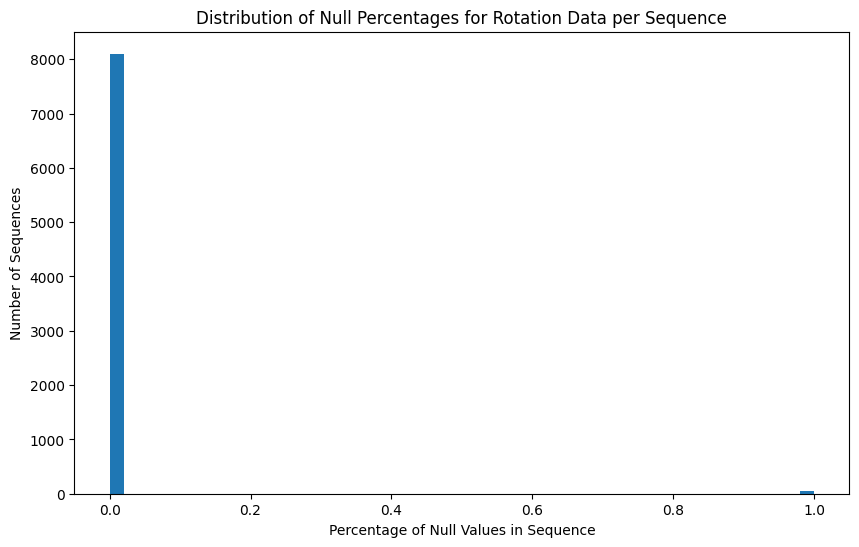

In [5]:
null_percentages = full_df.groupby('sequence_id')['rot_w'].apply(lambda x: x.isnull().mean())

# 2. Plot the histogram of these percentages
plt.figure(figsize=(10, 6))
plt.hist(null_percentages, bins=50)
plt.title('Distribution of Null Percentages for Rotation Data per Sequence')
plt.xlabel('Percentage of Null Values in Sequence')
plt.ylabel('Number of Sequences')
plt.show()

In [6]:
# drop na
bad_seq_id = full_df[full_df['rot_w'].isnull()]['sequence_id'].unique()
bad_seq_mask = filtered_df['sequence_id'].isin(bad_seq_id)
filtered_df = filtered_df[~bad_seq_mask]
filtered_df['rot_w'].isnull().sum()

np.int64(0)

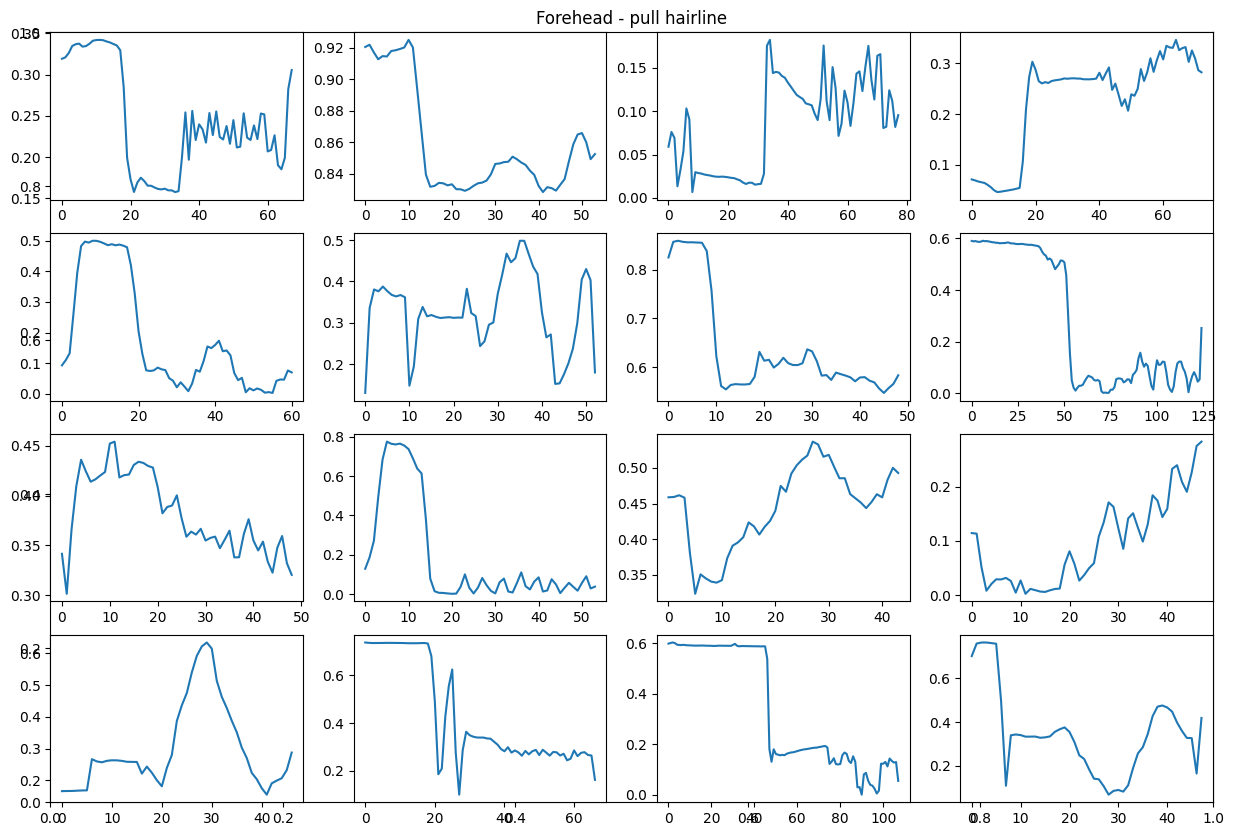

In [29]:
gesture_of_interest = filtered_df['gesture'].unique()[1]

sequences = full_df[full_df['gesture'] == gesture_of_interest]['sequence_id'].unique()

plt.figure(figsize=(15, 10))
plt.title(gesture_of_interest)
for i, seq in enumerate(sequences, start=1):
    if i >= 17:
        break
    plt.subplot(4, 4, i)
    mask = full_df['sequence_id'] == seq
    seq_of_interest = full_df[mask]['rot_w']
    plt.plot(np.arange(len(seq_of_interest)), seq_of_interest)
    